# 2.1 Hierarchical Clustering and PCA on Weather Data

## Contents
### 1. Import libraries and data sets
### 2. Prepare data sets
### 3. Hierarchical Clustering - Dendrograms
### 4. Dendrograms on only two stations
### 5. PCA

## 1. Import libraries and data sets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# path to project folder
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

### Weather dataset

In [3]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'), index_col=False)

In [4]:
weather_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
weather_df.shape

(22950, 170)

### Answers (pleasant) dataset

In [6]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [7]:
answers_df.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
answers_df.shape

(22950, 16)

## 2. Prepare data sets

### Remove columns of the three stations not in answers_df: GDANSK, ROMA, and TOURS

In [9]:
columns = weather_df.columns.tolist()

In [10]:
len(columns)

170

In [11]:
to_remove = ['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
              'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
            'TOURS_temp_max']

In [12]:
for col in to_remove:
    columns.remove(col)

In [13]:
len(columns)

149

In [14]:
unscaled_df = weather_df[columns]

In [16]:
unscaled_df.shape

(22950, 149)

In [17]:
unscaled_df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


### Select years to analyze - decade from 1990 to 2000

In [18]:
# Reduce the  dataset to specific years
df1990s = unscaled_df[unscaled_df['DATE'].astype(str).str.contains('199')] 
df1990s.shape

(3652, 149)

### Select years in answers and observe the cluster groupings

In [68]:
ans_1990s = answers_df[answers_df['DATE'].astype(str).str.contains('199')]
ans_1990s.shape

(3652, 16)

In [75]:
ans_1990s.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
ans_1990s.apply(pd.value_counts, normalize=True)

/var/folders/29/7ms2g5mn36vbg0j4kz50fxvr0000gn/T/ipykernel_14287/2700362423.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ans_1990s.apply(pd.value_counts, normalize=True)


,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0.763417,0.668949,0.67552,0.796824,0.780942,0.773275,0.804217,0.728368,0.783954,0.549836,0.802574,0.834611,1.0,0.835706,0.930175
1,0.236583,0.331051,0.32448,0.203176,0.219058,0.226725,0.195783,0.271632,0.216046,0.450164,0.197426,0.165389,NaN,0.164294,0.069825


### Scale the data

In [19]:
# create numerical df without date and month columns
num_df_1990s = df1990s.drop(columns=['DATE', 'MONTH'])
num_df_1990s.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,-2.1,-3.6,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,-1.8,-3.9,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,-2.2,-4.2,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,-0.7,-3.1,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,0.0,-3.1,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7


In [22]:
num_col = num_df_1990s.columns

In [23]:
# scaler object
scaler = StandardScaler()

In [25]:
# use scaler on numerical df
scaled_1990s = pd.DataFrame(scaler.fit_transform(num_df_1990s), columns=num_col)
scaled_1990s.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
2,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
3,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
4,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290


In [28]:
scaled_1990s.shape

(3652, 147)

## 3. Hierarchical Clustering - Dendrograms (all stations in the 1990 decade)

Create a dendrogram for the weather data using each of the four methods: single, complete, average, and ward. Record how many clusters you find using each method.

### Single method

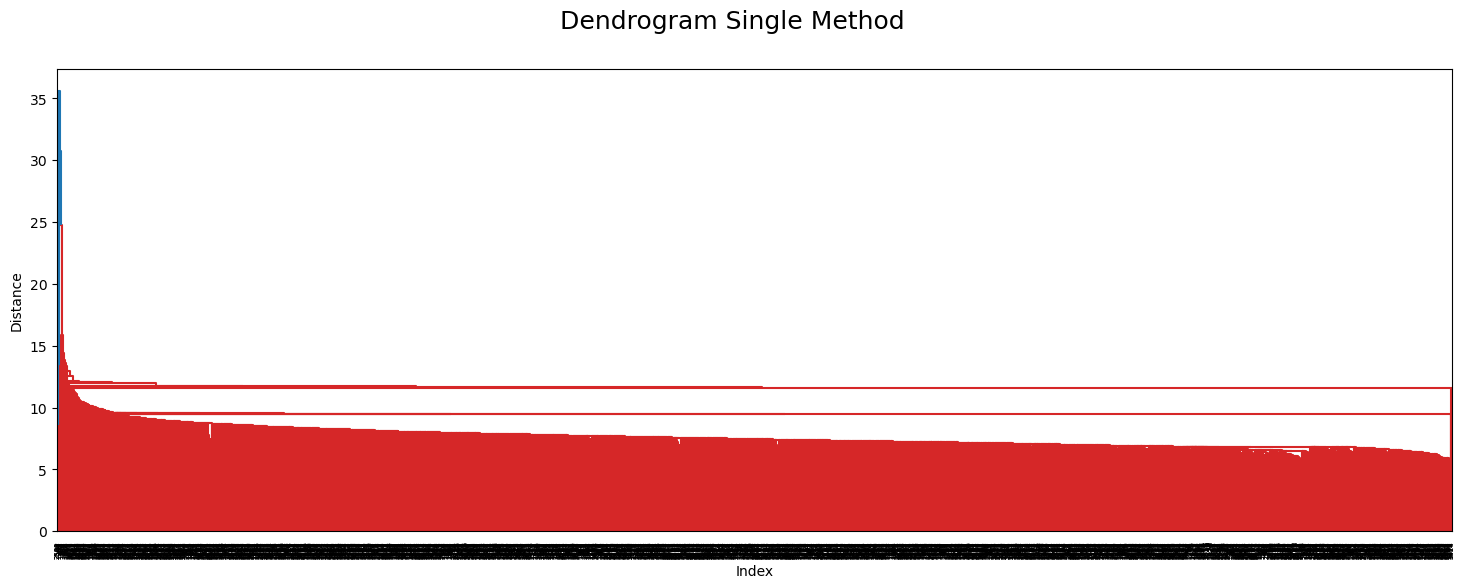

In [30]:
# on scaled data
distance_single = linkage(scaled_1990s, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

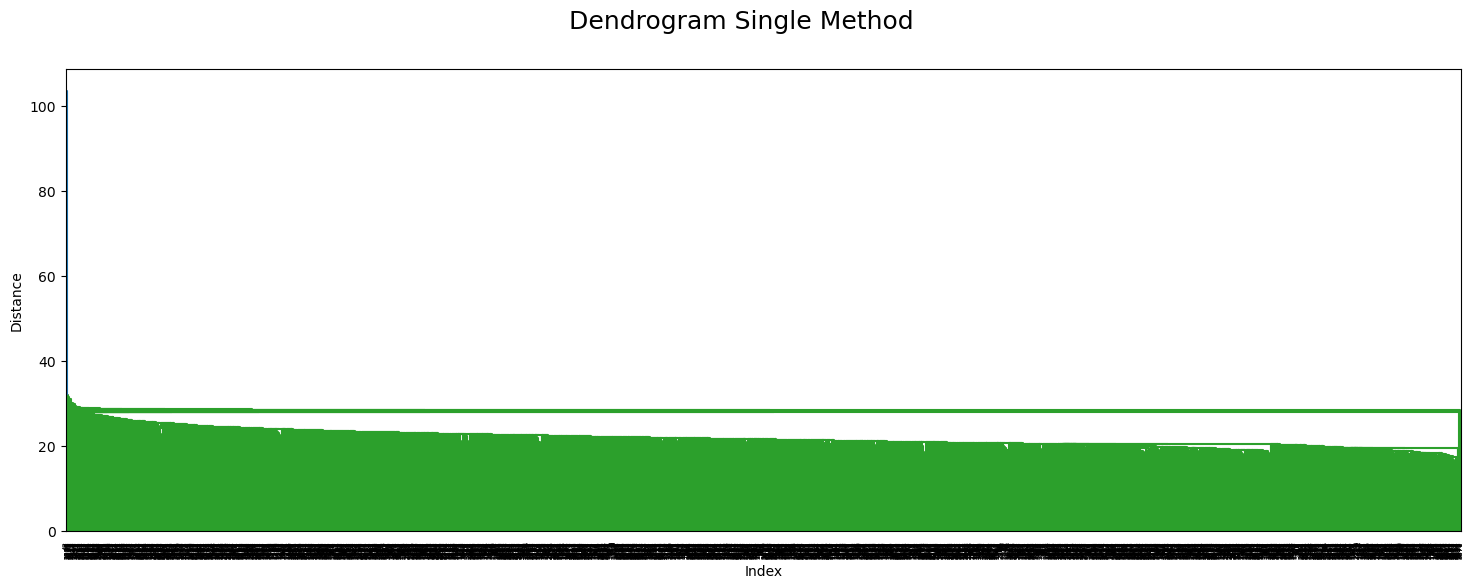

In [31]:
# on unscaled data
distance_single = linkage(num_df_1990s, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### Complete Method

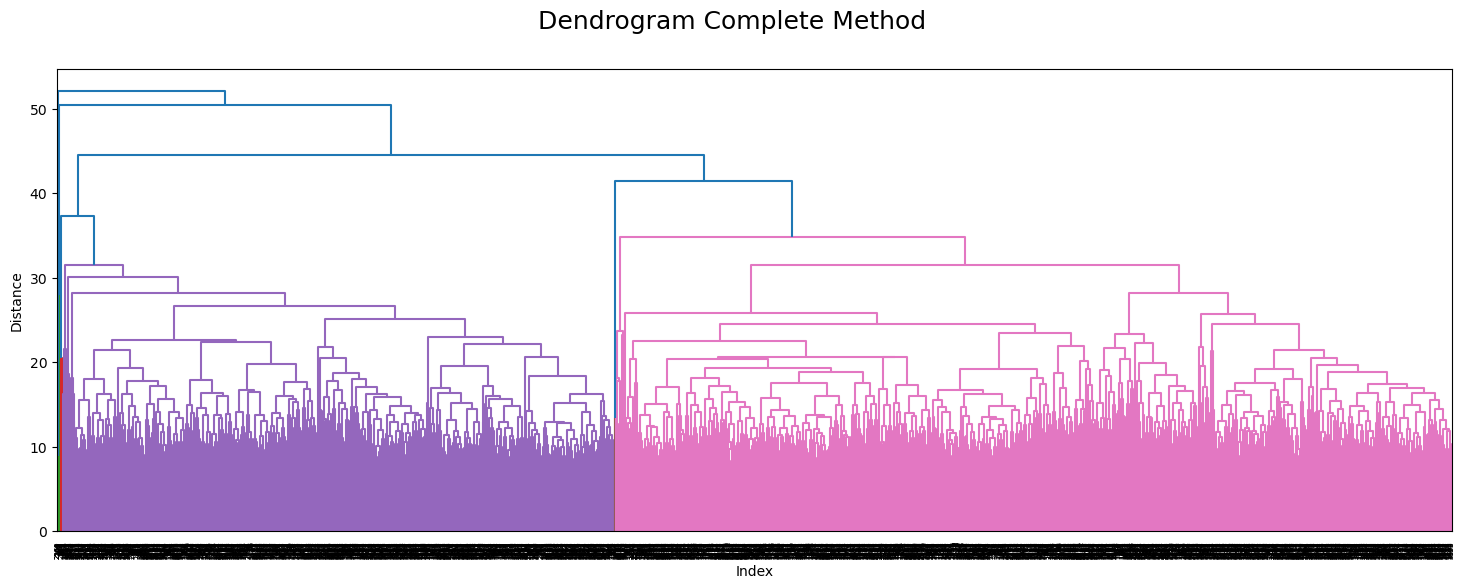

In [32]:
# on scaled data
distance_complete = linkage(scaled_1990s, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Average Method

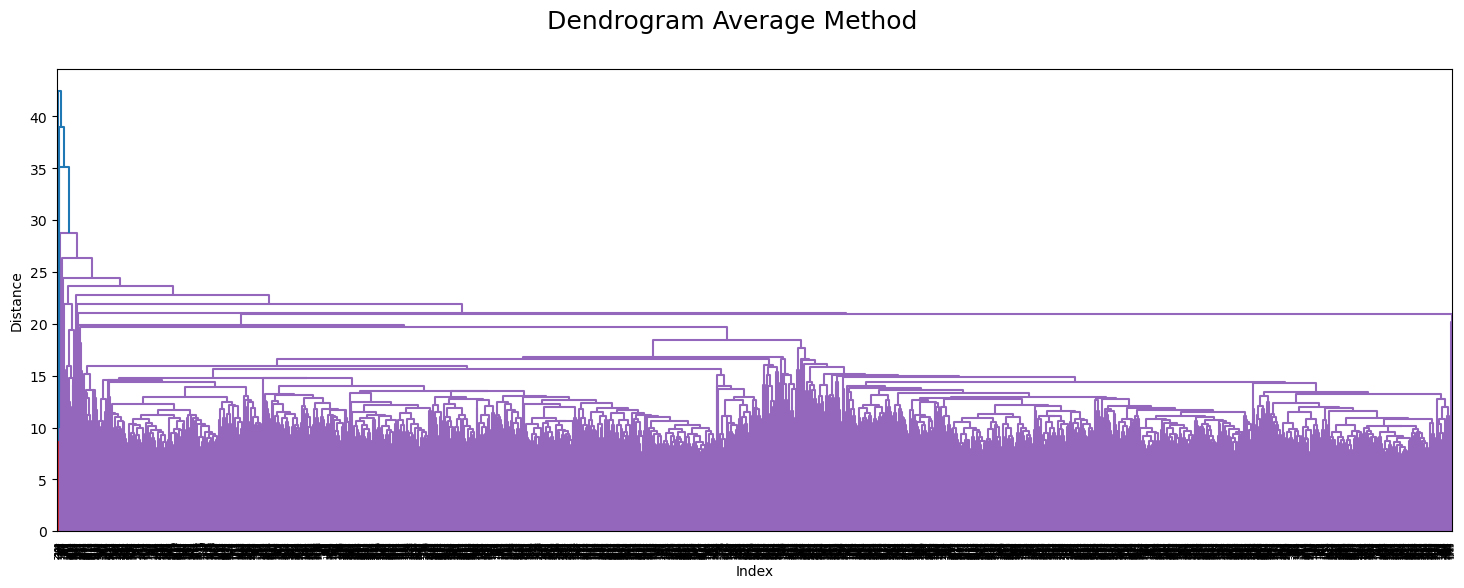

In [44]:
# on scaled data
distance_average = linkage(scaled_1990s, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Ward Method

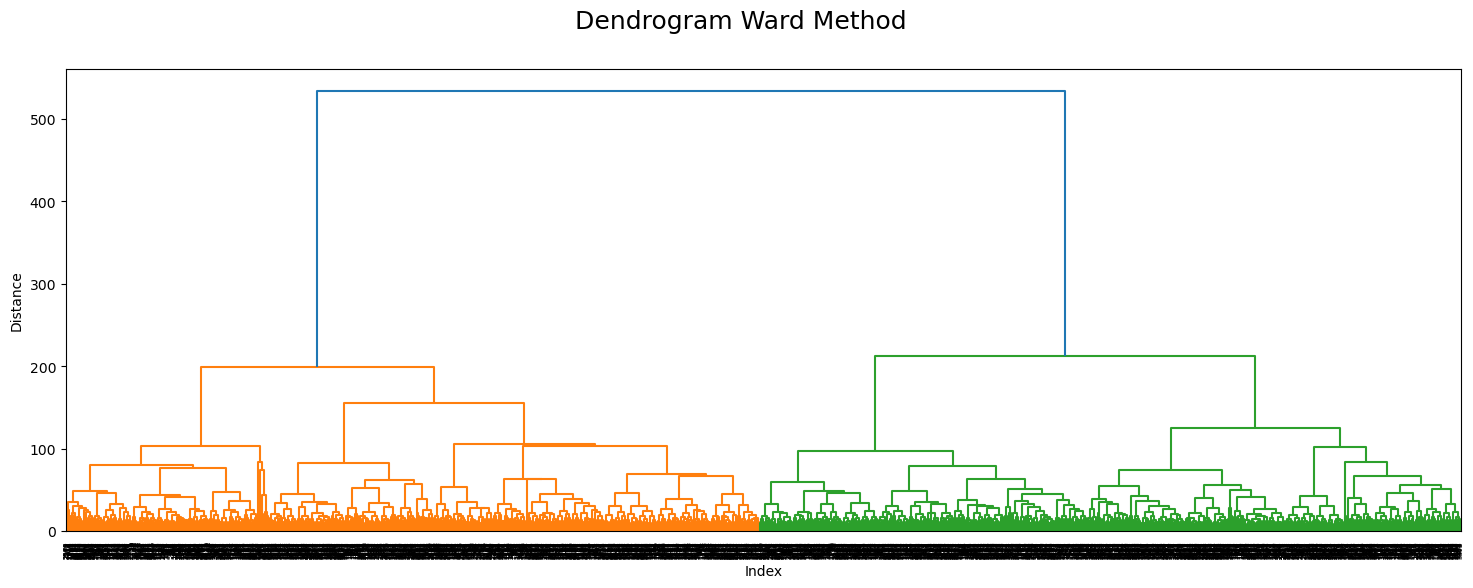

In [45]:
# on scaled data
distance_ward = linkage(scaled_1990s, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 4. Dendrograms on only two stations: BASEL and MADRID

In [36]:
all_col = scaled_1990s.columns.tolist()
all_col

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [37]:
basel_madrid = ['MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [38]:
bm_1990s = scaled_1990s[basel_madrid]
bm_1990s.head()

,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,...,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,1.763803,-2.086146,2.117061,0.380799,-1.674338,1.577152,-1.872629,-0.998517,-0.500847,-1.344834,...,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,-1.756720,-1.589005,-1.623684
1,1.763803,-1.012526,1.771068,0.562928,-1.674338,1.140403,-1.872629,-1.160680,-0.718101,-1.461243,...,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,-1.715202,-1.635909,-1.565253
2,1.377628,-1.012526,1.598071,-0.551276,-1.545424,-0.111611,-1.748733,-1.093112,-0.826728,-1.274989,...,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,-1.770560,-1.682812,-1.717173
3,0.219101,-1.012526,0.733088,0.637923,-0.922340,-0.315427,-0.286759,-1.160680,-1.199164,-1.100375,...,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,-1.562967,-1.510833,-1.506822
4,-0.939426,-1.012526,1.021416,1.323588,-0.825654,-0.315427,-0.014188,-1.106626,-1.059501,-1.112016,...,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,-1.466091,-1.510833,-1.460077


In [40]:
bm_1990s.shape

(3652, 21)

### Single Method - Basel/Madrid

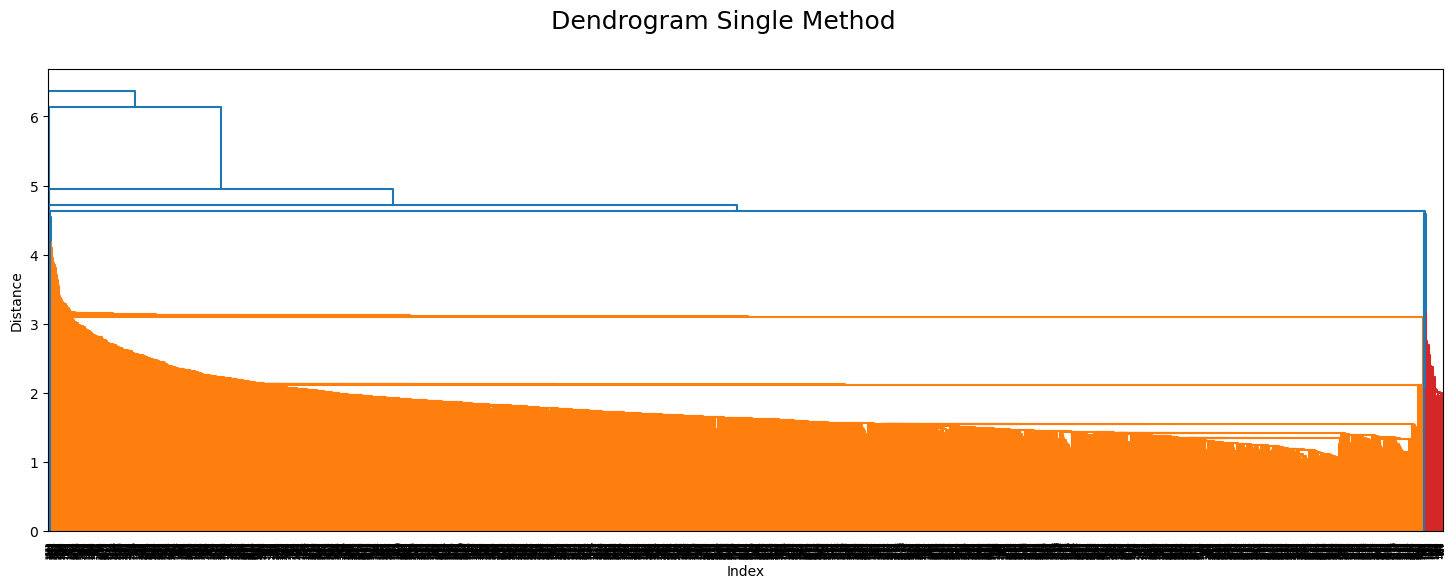

In [42]:
# on scaled data
distance_single = linkage(bm_1990s, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### Complete Method - Basel/Madrid

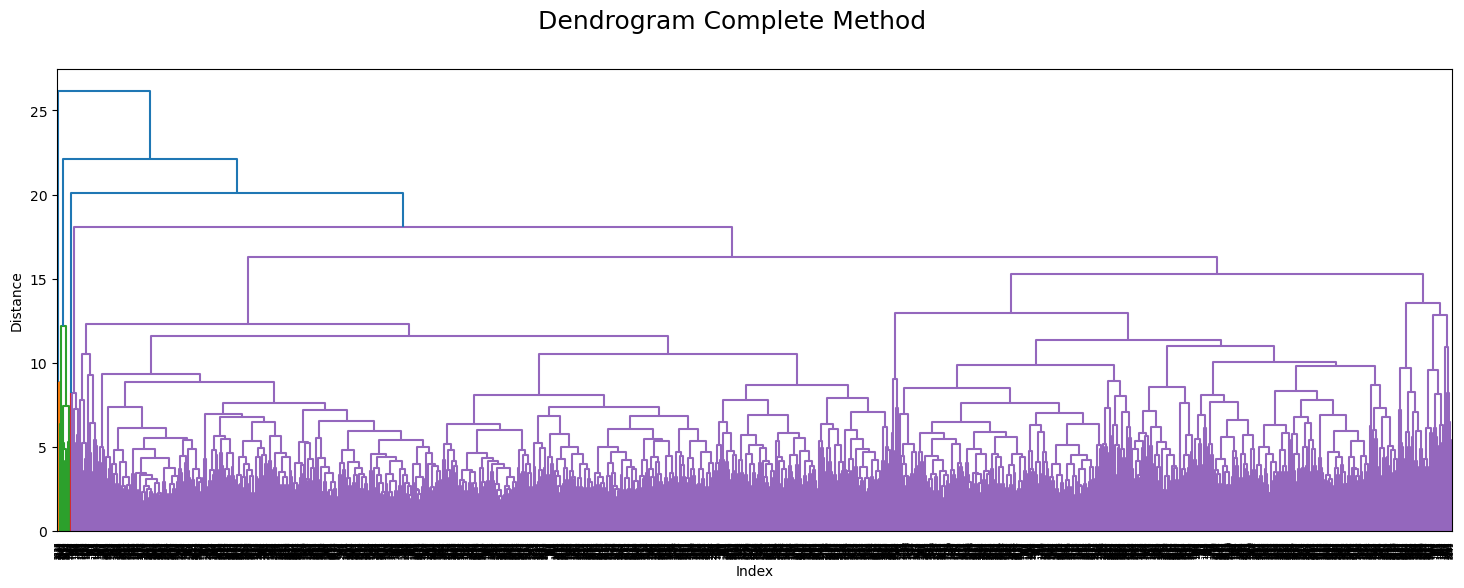

In [43]:
# on scaled data
distance_complete = linkage(bm_1990s, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Average Method - Basel/ Madrid

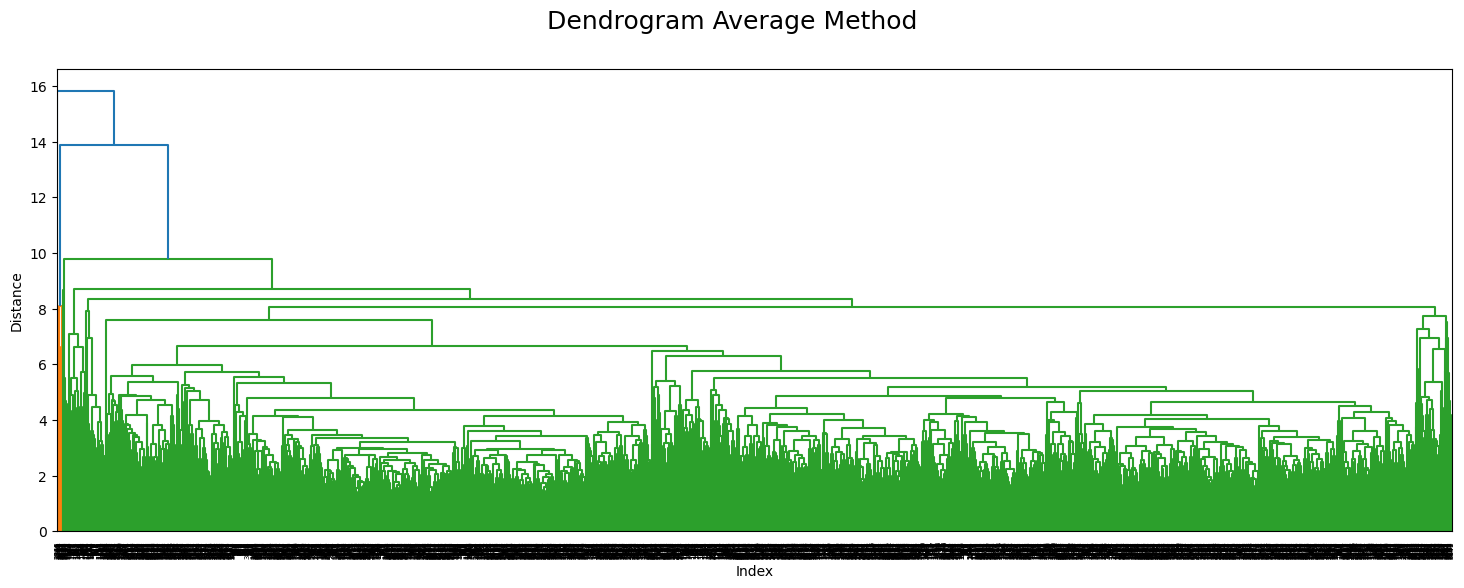

In [46]:
# on scaled data
distance_average = linkage(bm_1990s, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Ward Method - Basel/ Madrid

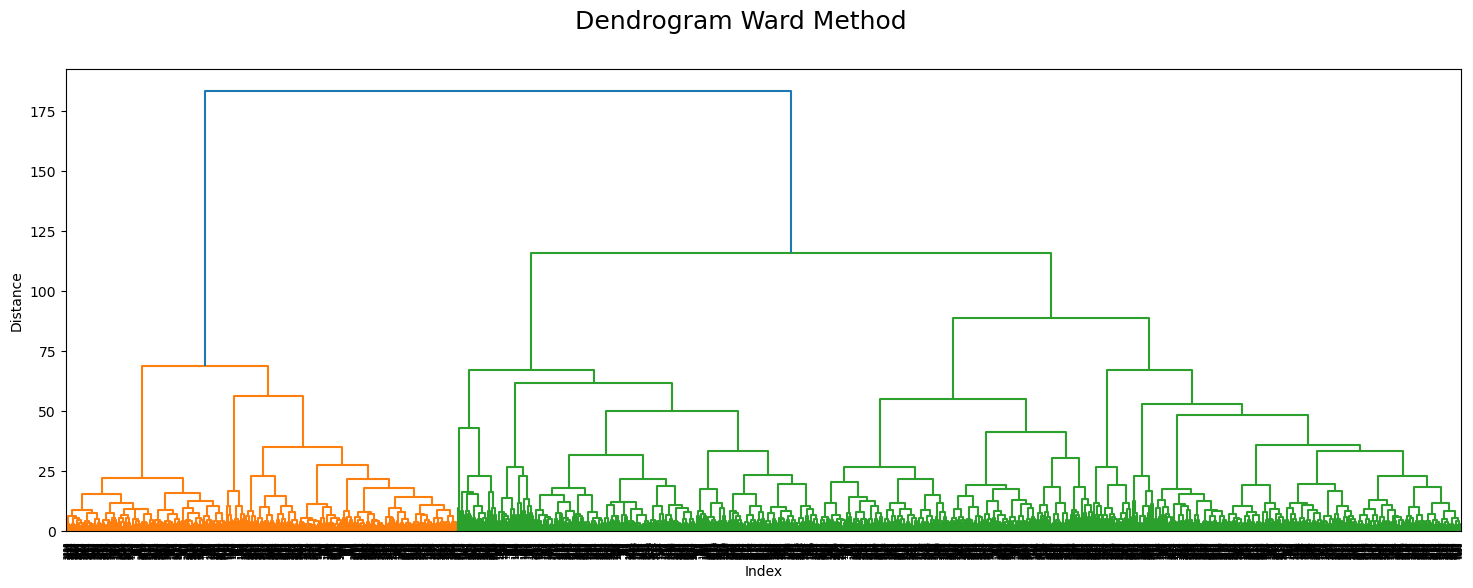

In [47]:
# on scaled data
distance_ward = linkage(bm_1990s, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 5. PCA

In [51]:
# view all columns again
all_col

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

15 Weather Stations, Average about 10 variables per station

In [52]:
#Run the PCA model, reducing to 15 components
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(scaled_1990s)

In [53]:
principalComponents

array([[-1.09574923e+01,  2.44234728e+00,  2.22686320e+00, ...,
        -7.54906474e-01, -2.37277307e-01, -2.03100824e-01],
       [-1.14399914e+01,  2.27730043e+00,  1.55412550e+00, ...,
        -1.37667691e-01,  3.08603979e-01, -2.59252239e-01],
       [-1.15092570e+01,  1.92202047e+00,  1.39694866e+00, ...,
        -4.74136670e-03,  1.63230402e+00,  6.84870712e-01],
       ...,
       [-1.06243207e+01, -1.40960534e+00, -2.51647017e+00, ...,
         3.70221228e+00, -6.79642284e-01,  1.72099342e-01],
       [-1.10745273e+01,  1.08798309e+00,  1.98663690e+00, ...,
        -5.55769680e-02, -1.25090672e+00,  2.41939879e-01],
       [-1.15507954e+01,  1.84900673e+00,  2.86394108e+00, ...,
         1.10517027e+00,  8.21231439e-01, -3.56268375e-01]])

In [57]:
# create columns names
pca_col = list()
for i in range(1, 16):
    pca_col.append(f'PCA_{i}')
pca_col

['PCA_1',
 'PCA_2',
 'PCA_3',
 'PCA_4',
 'PCA_5',
 'PCA_6',
 'PCA_7',
 'PCA_8',
 'PCA_9',
 'PCA_10',
 'PCA_11',
 'PCA_12',
 'PCA_13',
 'PCA_14',
 'PCA_15']

In [58]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=pca_col)
dfPCA.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-10.957492,2.442347,2.226863,-0.046812,2.406228,-3.336794,0.880735,-3.020788,1.070395,-0.382021,-1.353035,-0.322248,-0.754906,-0.237277,-0.203101
1,-11.439991,2.277300,1.554125,0.651248,2.323725,-2.174416,1.411471,-2.240947,1.424772,-0.438815,-2.000198,-0.690849,-0.137668,0.308604,-0.259252
2,-11.509257,1.922020,1.396949,0.876290,1.697859,-1.654612,-0.392384,-1.728279,0.182295,-1.218416,-0.242094,-0.250449,-0.004741,1.632304,0.684871
3,-10.497637,4.457652,3.290627,-0.676940,0.210355,0.283425,0.401292,-0.195023,0.953593,-0.086882,-0.500531,-0.675048,-0.316019,1.038155,-0.121503
4,-10.198109,2.604600,4.413382,1.924977,-0.212214,-1.223936,-1.626114,0.665689,-0.668647,-0.413367,0.644032,-0.698814,-1.689335,0.922171,0.067251


In [59]:
dfPCA.shape

(3652, 15)

### Export new dataset

In [60]:
dfPCA.to_csv(os.path.join(path, 'Data Sets', 'weather_PCA_15.csv'), index=False)